In [2]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Define the start and end dates
start_date = datetime(2020, 1, 1)
end_date = datetime(2024, 4, 15)

# Define the companies and their tickers
companies = ['TSLA', 'CRM', 'GS', 'MSFT', 'DAL', 'AAPL', 'V', 'F', 'DELL', 'GOOGL']

# Define the index (S&P 500)
index_ticker = '^GSPC'

# Download index data
index_data = yf.download(index_ticker, start=start_date, end=end_date)['Close'].pct_change().dropna()

# Initialize a dictionary to store betas
betas = {}

# Loop through each company, download the data, calculate beta and store it
for ticker in companies:
    # Download stock data
    stock_data = yf.download(ticker, start=start_date, end=end_date)['Close'].pct_change().dropna()

    # Align the index and the stock data by date
    aligned_data = pd.concat([stock_data, index_data], axis=1, join='inner')
    aligned_data.columns = ['stock_return', 'index_return']

    # Calculate covariance and variance
    covariance = aligned_data['stock_return'].cov(aligned_data['index_return'])
    variance = aligned_data['index_return'].var()

    # Calculate beta and store it
    beta = covariance / variance
    betas[ticker] = beta

# Convert the betas dictionary to a DataFrame for better visualization
betas_df = pd.DataFrame(list(betas.items()), columns=['Ticker', 'Beta'])

# Sort the DataFrame by beta values in descending order
sorted_betas_df = betas_df.sort_values(by='Beta', ascending=False)

# Print the sorted DataFrame
print(sorted_betas_df)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

  Ticker      Beta
0   TSLA  1.510127
4    DAL  1.293189
7      F  1.229984
1    CRM  1.205114
5   AAPL  1.183667
3   MSFT  1.176159
2     GS  1.135716
9  GOOGL  1.127314
8   DELL  1.117179
6      V  1.041367


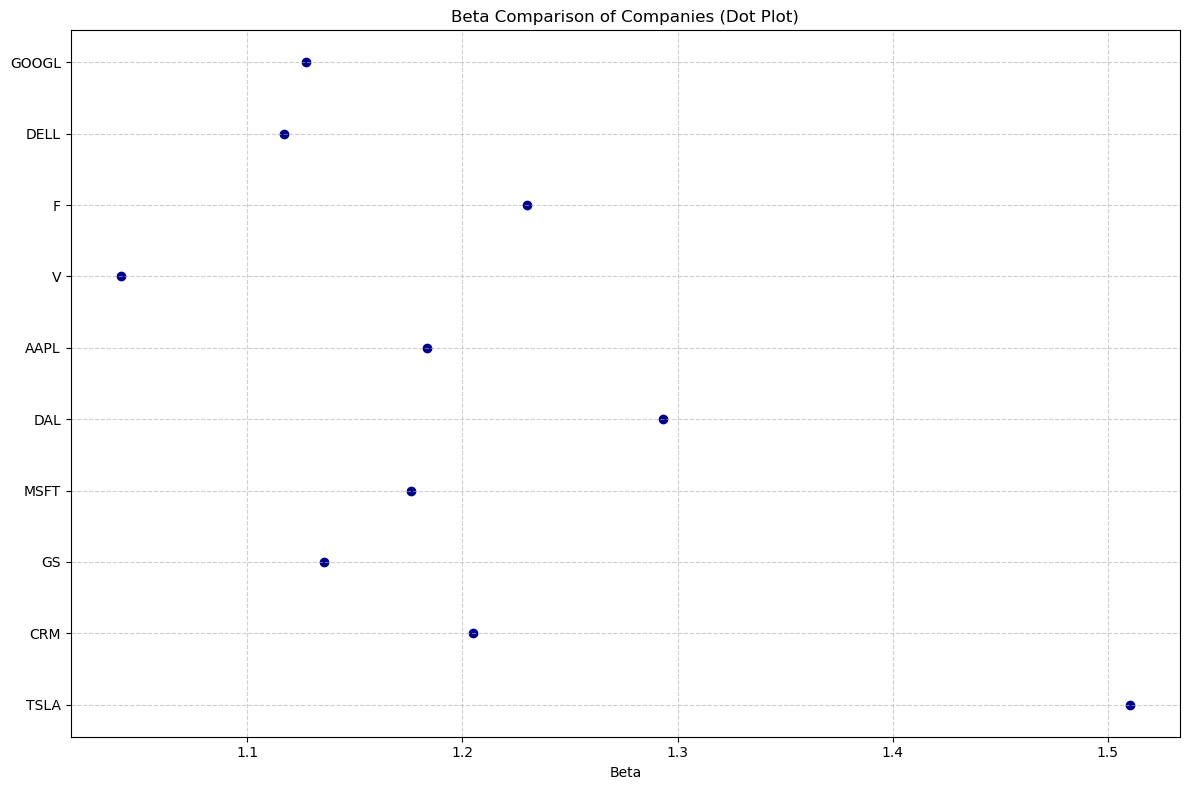

In [3]:
import matplotlib.pyplot as plt

# Plotting a dot plot
plt.figure(figsize=(12, 8))
plt.scatter(betas_df['Beta'], betas_df['Ticker'], color='darkblue')
plt.xlabel('Beta')
plt.title('Beta Comparison of Companies (Dot Plot)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('beta_comparison_dotplot.png')
plt.show()

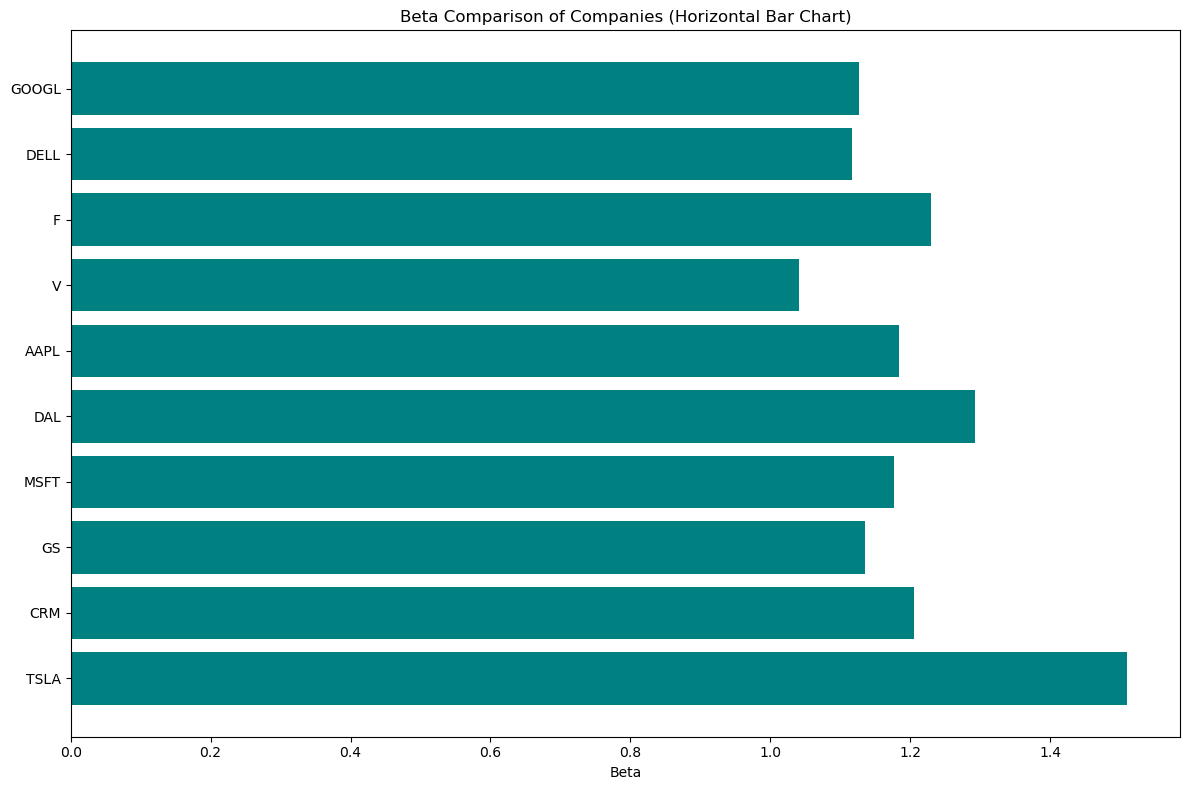

In [4]:
import matplotlib.pyplot as plt

# Assuming betas_df is already created and contains 'Company' and 'Beta'

# Plotting a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(betas_df['Ticker'], betas_df['Beta'], color='teal')
plt.xlabel('Beta')
plt.title('Beta Comparison of Companies (Horizontal Bar Chart)')
plt.tight_layout()
plt.savefig('beta_comparison_horizontal.png')
plt.show()

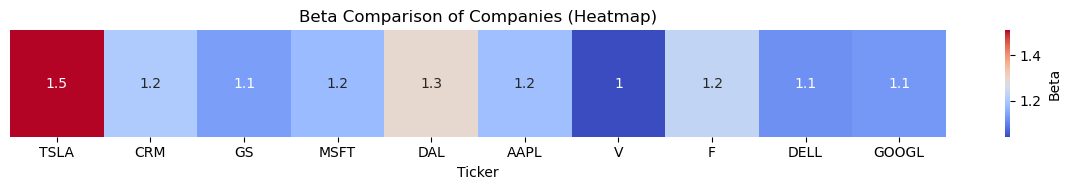

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a DataFrame suitable for heatmap
heatmap_data = betas_df.set_index('Ticker').T

# Plotting a heatmap
plt.figure(figsize=(12, 2))  # Width and height of the plot
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar_kws={'label': 'Beta'})
plt.title('Beta Comparison of Companies (Heatmap)')
plt.yticks([])  # Optionally remove y-ticks as they are not meaningful here
plt.tight_layout()
plt.savefig('beta_comparison_heatmap.png')
plt.show()